BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 10.1 Percentiles

In [6]:
# percentile: the smallest element in a set that is as least as large as p% of the elements
v = [1, 7, 3, 9, 5]
print(v)
print(percentile(25, v), percentile(50, v), percentile(80, v), percentile(99, v))

[1, 7, 3, 9, 5]
3 5 7 9


Lec 10.2 Estimation

In [7]:
sf = Table.read_table('../../data/san_francisco_2015.csv').select(3, 11, 21)
sf.set_format('Total Compensation', NumberFormatter(0))
sf = sf.where('Total Compensation', are.above(10000))
sf.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,"117,767"
"Public Works, Transportation & Commerce",Soft Floor Coverer,"41,210"
Community Health,Health Care Billing Clerk 2,"110,561"


In [8]:
sf.sort('Total Compensation')

Organization Group,Job,Total Compensation
Human Welfare & Neighborhood Development,Public Service Trainee,"10,002"
Community Health,Special Nurse,"10,003"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,004"
Human Welfare & Neighborhood Development,Public Svc Aide-Public Works,"10,006"
Public Protection,EMT Paramedic,"10,009"
"Public Works, Transportation & Commerce","Stdntdsgntrain1, Arch/Eng/Plng","10,010"
Human Welfare & Neighborhood Development,Public Service Trainee,"10,010"
General Administration & Finance,Communications Systems Tech,"10,014"
Community Health,Patient Care Assistant,"10,015"
"Public Works, Transportation & Commerce",Publ Svc Aide-Asst To Prof,"10,017"


In [9]:
sf.sort('Total Compensation', descending=True)

Organization Group,Job,Total Compensation
General Administration & Finance,Chief Investment Officer,"648,875"
General Administration & Finance,Asst Med Examiner,"480,509"
General Administration & Finance,Asst Med Examiner,"427,219"
"Public Works, Transportation & Commerce",Dept Head V,"426,686"
Community Health,"Adm, SFGH Medical Center","422,800"
Public Protection,"Chief, Fire Department","418,844"
"Public Works, Transportation & Commerce",Executive Contract Employee,"417,848"
Community Health,Senior Physician Specialist,"415,457"
Public Protection,Chief Of Police,"414,791"
"Public Works, Transportation & Commerce","Gen Mgr, Public Trnsp Dept","405,050"


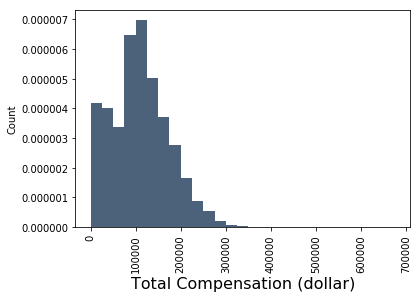

In [11]:
comp_bins = np.arange(0, 700000, 25000)
sf.hist('Total Compensation', bins=comp_bins, unit="dollar", normed=None, density=True)

In [12]:
# percentile is less influenced by outliers
percentile(50, sf.column('Total Compensation'))

107219.48

In [13]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Public Svc Aide-Public Works,"49,527"
"Public Works, Transportation & Commerce",Architectural Associate 1,"141,915"
"Public Works, Transportation & Commerce",Senior Water Services Clerk,"82,530"


In [14]:
# 50 percentile, aka median
percentile(50, sample_from_population.column('Total Compensation'))

111042.75

In [15]:
np.median(sf.column('Total Compensation'))

107219.48

In [16]:
np.median(sample_from_population.column('Total Compensation'))

111608.91

Lec 10.3 Estimate Variability

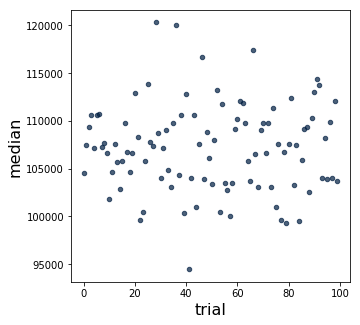

In [17]:
medians = []
repetitions = np.arange(100)
for i in repetitions:
    sample = sf.sample(200, with_replacement=False)
    median = np.median(sample.column('Total Compensation'))
    medians.append(median)
    
Table().with_columns('trial', repetitions, 'median', medians).scatter('trial')

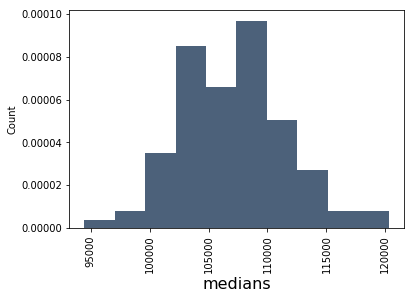

In [19]:
Table().with_column('medians', medians).hist(0, normed=None, density=True)

Lec 10.4 The Bootstrap

In [20]:
# get a sample w/o replacement from the actual population
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Landscape Architect Assoc 1,"84,977"
"Public Works, Transportation & Commerce",Transit Operator,"46,263"
"Public Works, Transportation & Commerce",Engineer,"185,195"


In [21]:
# check the median of this sample
np.median(sample_from_population.column('Total Compensation'))

107984.82

In [22]:
# resample w/ replacement - different median
resample = sample_from_population.sample()
np.median(resample.column('Total Compensation'))

103956.26

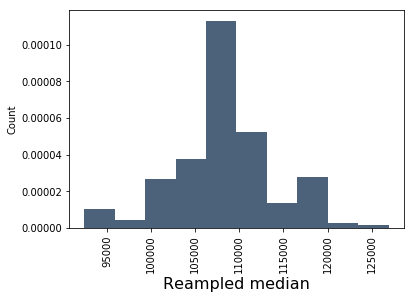

In [24]:
# instead of resampling from the actual population, let's use the unique sample
medians = []

for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column('Total Compensation'))
    medians.append(median)
    
Table().with_column('Reampled median', medians).hist(normed=None, density=True)

In [28]:
# 95% confidence interval
percentile(2.5, medians), percentile(97.5, medians)

(94506.555, 119487.44)

In [29]:
# 99% confidence interval
percentile(0.5, medians), percentile(99.5, medians)

(93482.51000000001, 124224.695)

In [30]:
# check how good is the method
intervals = Table(['Lower', 'Upper'])

for j in np.arange(100):
    sample_from_population = sf.sample(200, with_replacement=False)
    medians = []
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column('Total Compensation'))
        medians.append(median)
        
    interval_95 = [percentile(2.5, medians),
                   percentile(97.5, medians)]
    
    intervals.append(interval_95)

In [31]:
# it should be around 95
truth = np.median(sf.column('Total Compensation'))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

93

In [32]:
intervals.where('Lower', are.above(truth))

Lower,Upper
109945,127746
110437,126432
107258,117555
110301,124555


In [33]:
intervals.where('Upper', are.below(truth))

Lower,Upper
88210.7,104727
83172.3,104507
87852.3,105440
